In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [3]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## See distribution of target in training data

Text(0, 0.5, 'Frequency')

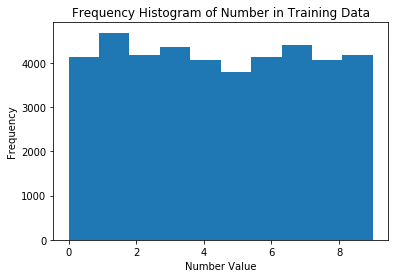

In [4]:
plt.hist(train['label'])
plt.title('Frequency Histogram of Number in Training Data')
plt.xlabel('Number Value')
plt.ylabel('Frequency')

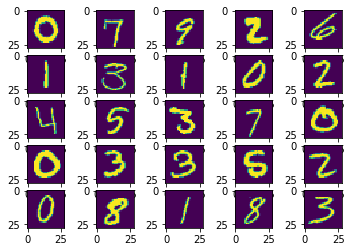

In [5]:
# plot the first 25 digits in training set
f, ax = plt.subplots(5,5)
# plot some 4s as an example
for i in range(1,26):
    # create a 1024x1024x3 array of 8 bit unsigned integers
    data = train.iloc[i, 1:785].values #this the first number. value in first row
    nrows, ncols = 28, 28 #must same with length i.e. 784
    grid = data.reshape((nrows, ncols)) #reshape vector to matrix
    n = math.ceil(i/5)-1
    m = [0, 1, 2, 3, 4]*5
    ax[m[i-1], n].imshow(grid)

## PCA

In [6]:
## normalize data ##
label_train=train['label']
train=train.drop('label', axis=1)

#normalize data
train = train / 255
test = test / 255
train['label'] = label_train

Text(0, 0.5, '% of variance explained')

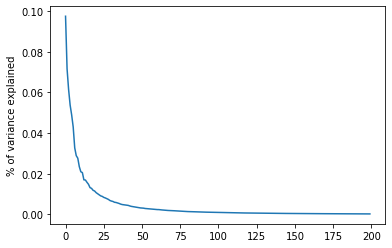

In [19]:
## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

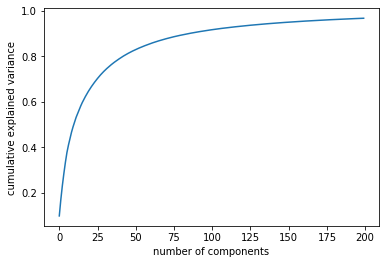

In [20]:
# pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #cumsum = cumulative sum of the elements along a given axis
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
# plot reaches asymptote at around 75, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=75) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

#decompose test data
pca.fit(test)
PCtest = pd.DataFrame(pca.transform(test))

## plot PC's

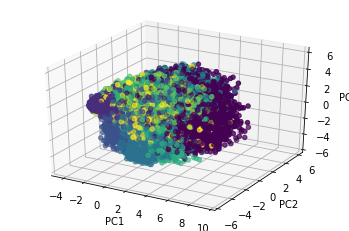

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## Split data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(PCtrain.drop('label', axis=1), PCtrain['label'], test_size=0.33, random_state=42)

## train model

In [41]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3500,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [43]:
clf.score(X_test, y_test)

0.9759740259740259